In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV


In [3]:
url = "pima-indians-diabetes.csv"
dataframe = pd.read_csv(url,header=None)
array = dataframe.values
X = array[:,0:8]
y = array[:,8]


In [4]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
modelnow=DecisionTreeClassifier(random_state=0, max_depth=2)
modelnow.fit(X,y)
yhat = modelnow.predict(X)
print ("Training Accuracy")
print (metrics.accuracy_score(y, yhat))
print (metrics.classification_report(y, yhat))
print (confusion_matrix(y, yhat))


Training Accuracy
0.7721354166666666
             precision    recall  f1-score   support

        0.0       0.79      0.89      0.84       500
        1.0       0.72      0.56      0.63       268

avg / total       0.77      0.77      0.76       768

[[443  57]
 [118 150]]


In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 5000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Test Accuracy")
print(metrics.accuracy_score(y_test, y_pred))
print()
print("Confussion Matrix")
print(confusion_matrix(y_test, y_pred))

Test Accuracy
0.7012987012987013

Confussion Matrix
[[114  37]
 [ 32  48]]


In [8]:
parameters = [{'criterion': ["gini", "entropy"], 'splitter': ["best", "random"], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 3, 4]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
Best = grid_search.fit(X_train, y_train)
Best.fit(X_train,y_train)
print("Best Parmeters are", Best.best_params_," Testing Accuracy is ", Best.best_estimator_.score(X_test,y_test))

best_model=Best.best_estimator_
yhat = best_model.predict(X_test)
print(metrics.accuracy_score(y_test,yhat))

Best Parmeters are {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'splitter': 'random'}  Testing Accuracy is  0.7186147186147186
0.7186147186147186


In [10]:
print(confusion_matrix(y_test, yhat))

[[140  11]
 [ 54  26]]


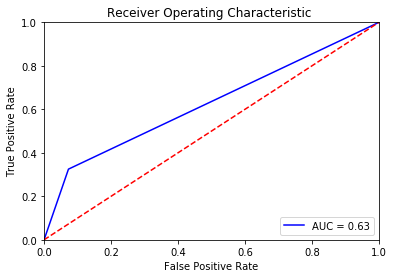

In [11]:
fpr, tpr, threshold = metrics.roc_curve(y_test, yhat)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [13]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(best_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("TreeModelExample") 
graph.view()


'TreeModelExample.pdf'